# ML MODELS AND ANALYSES FOR EV AND ICE VEHICLE EMISSIONS

This notebook variables and dataframes from the ev_and_ice_vehicle_datasets.ipynb to create machine learning models and create predictions.

## IMPORTED LIBRARIES

In [66]:
# Supports dataframes and data anlysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [67]:
# Supports machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [68]:
# Supports model evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics  import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

In [69]:
# Included to ignore any warning dialoge generated
import warnings
warnings.filterwarnings('ignore')

## IMPORTED DATASETS
GENERAL VEHICLE DATAFRAMES
* **total_veh_sales_US** - total monthly US vehicle sales (thousand units) from 1978 through 2023
* **annual_veh_sales** - total annual US vehicle sales (thousand units) from 1978 through 2023
* **vehicle_emission_standards** - ice fuel efficency standards (mpg) from 1978 through 2031
* **real_world_emissions_all** - real-world ice fuel efficiency (mpg) and emissions (CO2 g/mi) for all light weight vehicles from 1975 to 2023
* **world_emissions_by_class** - real-world fuel efficiency (mpg) and emissions (CO2 g/mi) by vehicle class


ELECTRIC VEHICLE DATAFRAMES
* **BEV_PHEV_stock** - global stock (millons of units) of BEV and PHEVs by country from 2013 through 2023
* **global_EV_sales** - global sales (millons of units) of all EV sales by country from 2012 through Q1 2024
* **ev_outlook_US_hist** - historic EV/BEV/PHEV share (%) sales and stock (millions of units) from 2010 through 2023
* **ev_outlook_US_proj_STEPS** - historic and projected EV/BEV/PHEV share (%) sales and stock (millions of units) based on stated policies from 2010 through 2035
* **ev_outlook_US_proj_APS** - historic and projected EV/BEV/PHEV share (%) sales and stock (millions of units) based on announced pledges from 2020 through 2035
* **BEV_and_ICE_lifecycle_GHG** - ice fuel effciency standards from 1978 through 2031\


ELECTRICITY DATAFRAMES
* **net_generation** - net electricity generation (thousand MWh) for all sectors energy in US from 2010 to 2023
* **sector_elec_consumption** - electricity consumption for all energy sectors in US from 2010 to 2023\


US GHG DATAFRAMES
* **emissions_by_econ_sector** - ice fuel effciency standards from 1978 through 2031
* **avoided_emissions_2035_proj** - projected net avoided vehicle lifecycle emission (mmt CO2e) based on stated policies, announced pledges and net zero emission scenarios from 2023 to 2035
* **share_avoided_emissions_2035_proj** - projected share of net avoided vehicle lifecycle emission (%) by EV type based on stated policies, announced pledges and net zero emission scenarios from 2023 to 2035
* **lifecycle_GHG_2023_2035** - lifecycle emissions (t CO2e/vehicle) by powertrain\

In [70]:
# Supports accessing the variables and dataframes in this notebook from another notebook
import os
from datetime import datetime, timedelta

# Runs the code in ev_and_ice_vehicle_datasets.ipynb making its variables and dataframes available in this notebook
%run ev_and_ice_vehicle_datasets.ipynb

'annual_veh_sales (thousand units, 1976 to 2023)'

,DATE,Total Vehicle Sales,Light Veh,Light Veh - Car,Light Veh - Truck,Heavy Veh,Light Veh Share - Car (%),Light Veh Share - Truck (%)
0,1976,13294.5,12969.8,9994.0,2975.8,324.7,0.770559,0.229441
1,1977,14859.0,14481.9,11046.0,3435.9,377.1,0.762745,0.237255
2,1978,15420.8,14981.0,11164.0,3817.0,439.8,0.745211,0.254789
3,1979,14148.5,13758.4,10558.8,3199.6,390.1,0.767444,0.232556
4,1980,11469.2,11197.5,8981.8,2215.7,271.7,0.802125,0.197875


'vehicle_emission_standards (mpg, 1978 to 2031)'

,Model Year,Passenger Cars,Light-Duty Trucks
0,1978,18.0,0.0
1,1979,19.0,0.0
2,1980,20.0,0.0
3,1981,22.0,0.0
4,1982,24.0,17.5


'real_world_emissions, 1975 to 2022'

,Model Year,Regulatory Class,Vehicle Type,Real-World MPG,Real-World CO2 (g/mi)
0,1975,All,All,13.05970,680.59612
1,1975,Car,All Car,13.45483,660.63740
2,1975,Car,Sedan/Wagon,13.45833,660.46603
3,1975,Truck,All Truck,11.63431,763.86134
4,1975,Truck,Pickup,11.91476,745.88139


'emissions_by_class , 1975 to 2023'

,Model Year,Class,Real-World MPG,Real-World CO2 (g/mi)
0,1975,All,13.059700,680.596120
1,1975,Car,12.680817,706.542443
2,1975,Truck,11.418960,779.081920
3,1976,All,14.221360,625.022380
4,1976,Car,13.436917,678.635883
5,1976,Truck,12.060400,737.305565
6,1977,All,15.067430,589.998800
7,1977,Car,14.447090,623.759743
8,1977,Truck,13.050228,681.629527
9,1978,All,15.837770,561.624420


'BEV_PHEV_stock (millions of units), 2013 to 2023'

,Year,China BEV,China PHEV,Europe BEV,Europe PHEV,United States BEV,United States PHEV,Rest of the world BEV,Rest of the world PHEV
0,2013,0.0,0.0,0.1,0.0,0.1,0.1,0.1,0.0
1,2014,0.1,0.0,0.1,0.1,0.1,0.2,0.1,0.0
2,2015,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.1
3,2016,0.5,0.2,0.3,0.3,0.3,0.3,0.1,0.1
4,2017,0.9,0.3,0.4,0.4,0.4,0.4,0.2,0.1


'global_EV_sales (millions of units), 2012 to Q1 2024'

,Year,China,Europe,United States,Rest of the world
0,2012,0.0,0.0,0.1,0.0
1,2013,0.0,0.1,0.1,0.0
2,2014,0.1,0.1,0.1,0.0
3,2015,0.2,0.2,0.1,0.0
4,2016,0.3,0.2,0.2,0.0


'ev_outlook_US_hist (millions of units, %), 2011 to 2035'

,region,category,parameter,mode,powertrain,year,unit,value
0,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200.00000
1,USA,Historical,EV stock,Cars,BEV,2010,Vehicles,3800.00000
2,USA,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.00016
3,USA,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",9.40000
4,USA,Historical,Electricity demand,Cars,EV,2010,GWh,96.00000
...,...,...,...,...,...,...,...,...
139,USA,Historical,EV sales,Cars,FCEV,2023,Vehicles,3000.00000
140,USA,Historical,EV stock,Cars,FCEV,2023,Vehicles,18000.00000
141,USA,Historical,EV sales,Cars,PHEV,2023,Vehicles,290000.00000
142,USA,Historical,"Oil displacement, million lge",Cars,EV,2023,"Oil displacement, million lge",9700.00000


'ev_outlook_US_proj_STEPS (millions of units, %), 2011 to 2035'

,region,category,parameter,mode,powertrain,year,unit,value
0,USA,Projection-STEPS,Oil displacement Mbd,Cars,EV,2020,Milion barrels per day,0.043
1,USA,Projection-STEPS,"Oil displacement, million lge",Cars,EV,2020,"Oil displacement, million lge",2500.000
2,USA,Projection-STEPS,Electricity demand,Cars,EV,2020,GWh,5400.000
3,USA,Projection-STEPS,EV sales,Cars,BEV,2020,Vehicles,230000.000
4,USA,Projection-STEPS,EV stock,Cars,BEV,2020,Vehicles,1100000.000
...,...,...,...,...,...,...,...,...
72,USA,Projection-STEPS,Oil displacement Mbd,Cars,EV,2035,Milion barrels per day,2.500
73,USA,Projection-STEPS,"Oil displacement, million lge",Cars,EV,2035,"Oil displacement, million lge",140000.000
74,USA,Projection-STEPS,Electricity demand,Cars,EV,2035,GWh,460000.000
75,USA,Projection-STEPS,EV stock share,Cars,EV,2035,percent,36.000


'ev_outlook_US_proj_APS (millions of units, %), 2011 to 2035'

,region,category,parameter,mode,powertrain,year,unit,value
0,USA,Projection-APS,EV sales,Cars,BEV,2020,Vehicles,230000.0
1,USA,Projection-APS,EV stock,Cars,BEV,2020,Vehicles,1100000.0
2,USA,Projection-APS,EV sales,Cars,FCEV,2020,Vehicles,1200.0
3,USA,Projection-APS,EV stock,Cars,FCEV,2020,Vehicles,9200.0
4,USA,Projection-APS,EV sales,Cars,PHEV,2020,Vehicles,64000.0
...,...,...,...,...,...,...,...,...
72,USA,Projection-APS,EV stock,Cars,BEV,2035,Vehicles,76000000.0
73,USA,Projection-APS,EV stock,Cars,FCEV,2035,Vehicles,130000.0
74,USA,Projection-APS,EV stock,Cars,PHEV,2035,Vehicles,14000000.0
75,USA,Projection-APS,Oil displacement Mbd,Cars,EV,2035,Milion barrels per day,2.0


'BEV_and_ICE_lifecycle_GHG (tCO2e per vehicle)'

,Vehicle Type,Vehicle manufacturing,Batteries-assembly and other,Batteries-minerals,Electricity,Fuel cycle (well-to-wheel),Unnamed: 6
0,Battery electric vehicle - Base case,5.4,1.20,1.40,11.7,0.0,NaN
1,Battery electric vehicle - High-GHG minerals ...,5.4,1.20,2.80,11.7,0.0,NaN
2,Internal combustion engine vehicle,6.0,0.01,0.03,0.0,35.9,NaN


'net_generation (thousand MWh), 2010 to 2023'

,year,all fuels (utility-scale),coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,all utility-scale solar
1,2010,4125060,1847290,23337,13724,987697,11313,806968,260203,0,94652,1212,15219,56089,37172,18917,-5501,12855,--,--,1212
2,2011,4100141,1733430,16086,14096,1013689,11566,790204,319355,0,120177,1818,15316,56671,37449,19222,-6421,14154,--,--,1818
3,2012,4047765,1514043,13403,9787,1225894,11898,769331,276240,0,140822,4327,15562,57622,37799,19823,-4950,13787,--,--,4327
4,2013,4065964,1581115,13820,13344,1124836,12853,789016,268565,0,167840,9036,15775,60858,40028,20830,-4681,13588,--,--,9036
5,2014,4093564.0,1581710.0,18276.0,11955.0,1126635.0,12022.0,797166.0,259367.0,0.0,181655.0,17691.0,15877.0,63989.0,42340.0,21650.0,-6174.0,13393.0,28924.0,11233.0,17691.0


'sector_elec_consumption (thousand tons coal, thousand barrels liquid, thousand tons coke, thousand Mcf NG), 2010 to 2023'

,year,coal,petroleum liquids,petroleum coke,natural gas
1,2010,979684.0,40103.0,4994.0,7680185.0
2,2011,934938.0,27326.0,5012.0,7883865.0
3,2012,825734.0,22604.0,3675.0,9484710.0
4,2013,860729.0,23231.0,4852.0,8596299.0
5,2014,853634.0,31531.0,4412.0,8544387.0


'emissions_by_econ_sector (MMT CO2e), 1990 to 2022'

,Year,Transportation,Electricity Generation,Industry,Agriculture,Commercial,Residential,Total
0,1990,1521.4,1880.2,1723.3,595.9,447.0,345.6,6513.5
1,1991,1474.8,1874.4,1702.9,587.4,454.5,355.3,6449.2
2,1992,1533.8,1889.6,1729.3,587.5,450.0,361.8,6552.0
3,1993,1570.2,1965.0,1701.0,608.7,443.1,373.1,6661.2
4,1994,1624.5,1989.6,1719.7,612.2,446.1,363.8,6755.8


'avoided_emissions_2035_proj (MMT CO2e), 2023 to 2035'

,Year,STEPS,APS,NZE
0,2023,-130,-130,-120
1,2024,-180,-180,-200
2,2025,-240,-250,-310
3,2026,-320,-330,-440
4,2027,-420,-430,-600


'lifecycle_GHG_2023_2035 (t CO2e per vehicle), 2023 to 2035'

,Powertrain Type,Car production,Battery production,Well-to-tank,Tank-to-wheel,Grid decarbonisation impact
0,ICEV,3.7,0.0,11.5,30.9,0.0
1,HEV,3.7,0.1,9.8,26.3,0.0
2,PHEV,4.4,1.3,11.7,15.8,1.9
3,BEV,3.3,5.3,14.5,0.0,4.8
4,ICEV,3.7,0.0,8.1,26.4,0.0


In [71]:
# Added to show all columns in df display
pd.options.display.max_columns = None 

## ICE VEHICLE EMISSIONS CONTRIBUTION

**Vehicle Predicted Sales (Using Linear Regression)**
NOTE: still need to separate EV projected sales from total sales predictions

Mean squared error: 1871271.2281914323
R-squared score: -0.6392760426544879

Predicted Vehicles Sales in the US:
   Year  Predicted Total Vehicle Sales
0  2035                   16265.557021
1  2040                   16469.035177
2  2045                   16672.513334
3  2050                   16875.991490


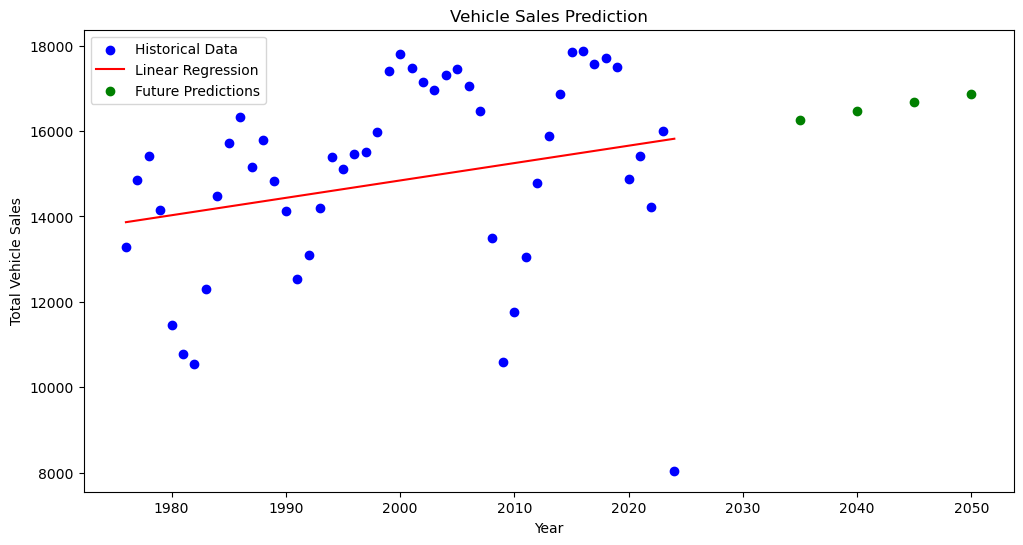

In [72]:
# Prepare the data (Annual vehicle sales)
X = annual_veh_sales[['DATE']]
y = annual_veh_sales['Total Vehicle Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model/Fit
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

# Predict (Annual vehicle sales in 2035, 2040, 2045, 2050)
future_years = np.array([2035, 2040, 2045, 2050]).reshape(-1, 1)
future_predictions = model.predict(future_years)

predictions_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Total Vehicle Sales': future_predictions
})

print("\nPredicted Vehicles Sales in the US:")
print(predictions_df)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.scatter(future_years, future_predictions, color='green', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Total Vehicle Sales')
plt.title('Vehicle Sales Prediction')
plt.legend()
plt.show()


**ICE Vehicle Predicted Fuel Efficiency**

**NOTES (to do)**

1) To get to per vehicle emissions prediction, need to incorporate annual MPG standards data (vehicle_emission_standards) by class after 2023 and then predict Real World CO2 by class (emissions_by_class)
2) Need to apply to forecasted vehicle sales to get emission contributions from ICE

In [74]:
# Clean the data
real_world_emissions_all['Model Year'] = real_world_emissions_all['Model Year'].apply(clean_year)

# Remove any rows with NaN values after cleaning
real_world_emissions_all = real_world_emissions_all.dropna()

# Prepare the data
X = real_world_emissions_all[['Model Year']].values
y_mpg = real_world_emissions_all['Real-World MPG'].values
y_co2 = real_world_emissions_all['Real-World CO2 (g/mi)'].values

# Model/Fit
model_mpg = LinearRegression()
model_co2 = LinearRegression()

model_mpg.fit(X, y_mpg)
model_co2.fit(X, y_co2)

# Predict 
future_years = np.array([2030, 2035, 2040, 2045, 2050]).reshape(-1, 1)
predicted_mpg = model_mpg.predict(future_years)
predicted_co2 = model_co2.predict(future_years)

# Shows prediction for ice efficincy (mpg) and emissions (CO2 g/mi) for 2030, 2035, 2040, 2045, 2050
predictions = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted MPG': predicted_mpg,
    'Predicted CO2 (g/mi)': predicted_co2
})

display(predictions)



,Year,Predicted MPG,Predicted CO2 (g/mi)
0,2030,26.300089,313.647198
1,2035,27.128656,295.003076
2,2040,27.957223,276.358955
3,2045,28.785790,257.714833
4,2050,29.614356,239.070711


**Total ICE Vehicle Predicted GHG Emissions**

In [ ]:
# Need to factor updated per vehicle emissions and vehicle sales predictions

## ELECTRIC VEHICLE EMISSIONS CONTRIBUTION

**EV Predicted Sales**

**Electricity Generation Predicted GHG**

**EV Predicted GHG Emissions**